# Chapter 4 - Classification
This chapter will discuss qualitative (categorical) variables (classification problems). Classification problems can be thought of as regression problems since most of the models return a probability of being in a certain class. Since probabilities take on real values the problem can also be called regression - as in logistic regression - a machine learning technique that is used for classification but returns probabilities as real values.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
default = pd.read_csv("data/default.csv")

In [12]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


data must be explored (EDA) first before fit into a model 

(-100.0, 2500.0)

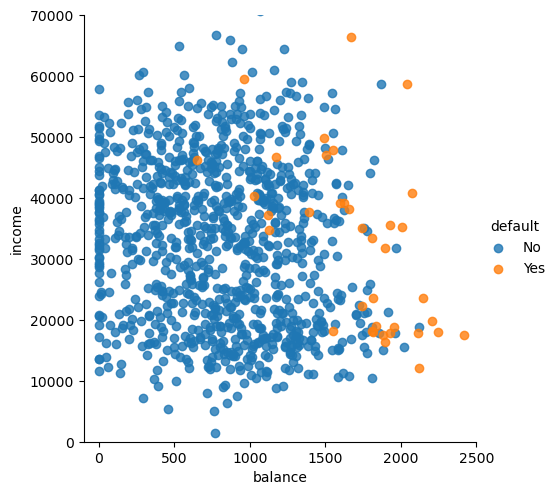

In [13]:
sns.lmplot(x='balance', y='income', data=default.sample(1000), hue='default', fit_reg=False)
plt.ylim([0,70000])
plt.xlim([-100,2500])

from the plot above, we can see that income does not influence whether a person default or not. However, balance does influence whether a person default or not

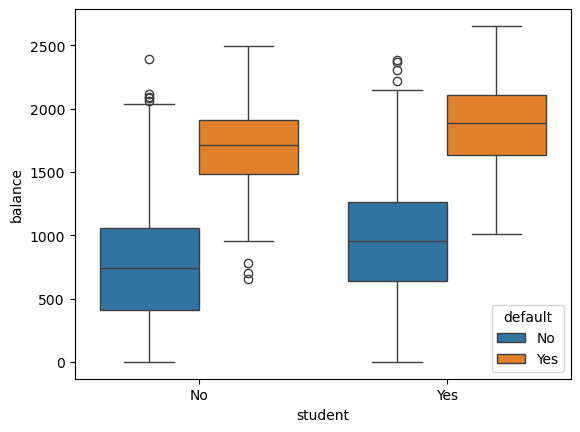

In [36]:
# evidence tha
sns.boxplot(x='student', y='balance', data=default, hue='default');

student or not does not effect towards whether a person is a defaulter or not

# Why not linear regression
Though it is always possible to use numeric values for the categories of the response, there generally is no natural way to order and separate the values in a way that makes sense. Only in a two-category problem will the ordering make sense but even then linear regression will produce probability estimates outside of [0, 1].

In [37]:
import statsmodels.formula.api as smf
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [38]:
# make column for Yes defaults
default['Yes'] = (default['default'] == 'Yes').astype(int)

<Axes: xlabel='balance', ylabel='Yes'>

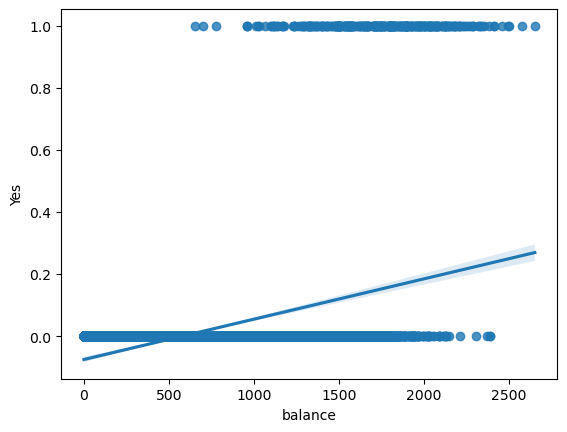

In [39]:
# linear regression model for default
# not ideal and could be made better by simply making all probabilites < 0 equal to 0
# and all probabilites > 1 equal to 1
sns.regplot(x='balance', y='Yes', data=default)

# Logistic regression
Find function that always outputs number between 0 and 1. Many functions satisfy this condition. For logistic regression the ... logistic function! is used.

$$y = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

Many times you will see this as the sigmoid function in a simpler format

$$y = \frac{1}{1 + e^{-t}}$$

Where $t$ is just the normal linear model $t = \beta_0 + \beta_1X$. Some algebra can be used to show the two equations above are equivalent.

y can now be thought as the probability given some value X since it will always be between 0 and 1. Some more algebra can show that $$log{\frac{p(X)}{1 - p(X)}} = \beta_0 + \beta_1X$$

Where $y$ has been replaced by $p(X)$, the probability of $X$. The expression $\frac{p(X)}{1 - p(X)}$ is known as the 'odds'. So for instance if you are gambling and think that Clinton will win the presidency 80% of the time. The odds would be .8/.2 = 4 or said "4 to 1". For every 4 times she wins, Trump will win once.

What logistic regression is saying, that the log odds are modeled by a linear model which can be solved by linear regression. This has the literal meaning of - given a one unit increase in one of the variables (say $X_1$), a $\beta_1$ increase will occur to the log-odds. Or equivalently, the odds will be multiplied by $e^{\beta_1}$.

In our election example, $X_1$ could be the percentage of voters under 30 and $\beta_1$ could be .5. That would mean if $X_1$ were to increase by 1 percentage point, Clinton's log odds would increase by .5. In our example from above, Clinton's log odds would go from 4 to 4.5 and her probability of winning would go from 80% to 4.5 / 5.5 or 82%

There is no straight-line relationship between the probability of being in a certain class and X in logistic regression because of the need to have probabilities between 0 and 1

# Estimating coefficients through Maximum Likelihood
In linear regression, the model coefficients were found by minimizing the squared residuals. In logistic regression, we maximize the probabilities of all points by a method called maximum likelihood. Maximum likelihood multiplies the model probability for each observation together and chooses parameters that maximize this number. The log likelihood is actually used as numerical underflow will be a problem for must problems with a non-trivial amount of data.

In [18]:
# Think about doing a maximum likelihood example with 4 coin tosses and 3 heads.
# Start with .5 then choose .6 and see the differences

In [19]:
results = smf.logit('Yes ~ balance', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                  0.4534
Time:                        11:00:56   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

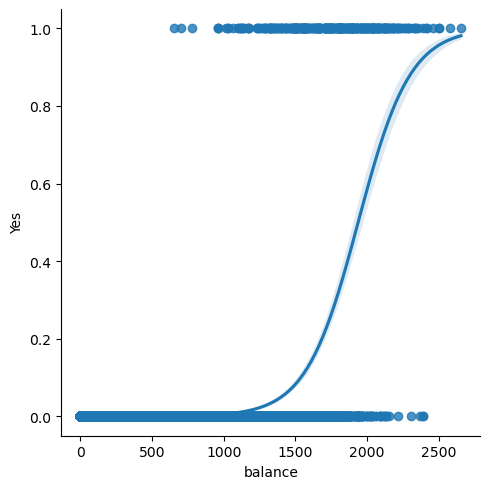

In [40]:
# Looks quite a bit different than the linear regression model
sns.lmplot(x='balance', y='Yes', data=default, logistic=True);

## Interpretation
For every one dollar increase in balance the log odds increases by .0555. The log odds when there is no balance is -10.6

In [22]:
# p / (1 - p) = 
odds = np.exp(-10.65)
odds

2.3700841597751968e-05

In [23]:
# (1 - p) / p = 1 / odds
one_over_odds = 1 / odds

In [24]:
# 1/p = one_over_odds + 1
one_over_p = one_over_odds + 1

In [25]:
# p = 1 / one_over_p

In [26]:
# since p is so close to 0, p / (1 - p) is nearly equivalent to p
p = 1 / one_over_p
p

2.370027988117268e-05

# Scikit-learn for easier prediction
main library for machine learning
http://scikit-learn.org/stable/

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
# this actually uses regularization by default which will be covered in later chapters
lr = LogisticRegression()

In [43]:
X = np.column_stack((np.ones(len(default)), default['balance']))

In [44]:
X

array([[1.00000000e+00, 7.29526495e+02],
       [1.00000000e+00, 8.17180407e+02],
       [1.00000000e+00, 1.07354916e+03],
       ...,
       [1.00000000e+00, 8.45411989e+02],
       [1.00000000e+00, 1.56900905e+03],
       [1.00000000e+00, 2.00922183e+02]])

In [45]:
lr.fit(X, default['Yes'])

LogisticRegression()

In [32]:
# Model coefficients are different by B1 is very similar
lr.coef_

array([[0.0017222 , 0.00549912]])

In [33]:
# predict 1000 dollar balance default
lr.predict_proba([[1, 1000]]) # 99 percent chance no default

array([[0.99424861, 0.00575139]])

In [34]:
# predict 2000 dollar balance default
lr.predict_proba([[1, 2000]]) ## 55 percent chance default

array([[0.41421403, 0.58578597]])

In [35]:
# predict 3000 dollar balance default
lr.predict_proba([[1, 3000]]) ## >99 percent chance default

array([[0.002884, 0.997116]])

# Multiple Linear Regression
more than 1 predictor

In [47]:
results = smf.logit('Yes ~ balance + student', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                  0.4619
Time:                        11:38:18   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.7495      0.369    -29.115      0.000     -11.473     -10.026
student[T.Yes]    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
balance            0.0057      0.000     24.748      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [49]:
default['student_yes'] = (default['student'] == 'Yes').astype(int)

In [50]:
X = np.column_stack((np.ones(len(default)), default['balance'], default['student_yes']))

In [51]:
X

array([[1.00000000e+00, 7.29526495e+02, 0.00000000e+00],
       [1.00000000e+00, 8.17180407e+02, 1.00000000e+00],
       [1.00000000e+00, 1.07354916e+03, 0.00000000e+00],
       ...,
       [1.00000000e+00, 8.45411989e+02, 0.00000000e+00],
       [1.00000000e+00, 1.56900905e+03, 0.00000000e+00],
       [1.00000000e+00, 2.00922183e+02, 1.00000000e+00]])

In [52]:
lr.fit(X, default['Yes'])

LogisticRegression()

In [53]:
lr.coef_

array([[-4.08341922e-06,  5.73175365e-03, -6.99680131e-01]])

In [54]:
# predict 1000 dollar balance default
lr.predict_proba([[1, 2000, 1]]) # 99 percent chance no default

array([[0.49522952, 0.50477048]])

# Simpsons paradox

A phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined.

In [55]:
results = smf.logit('Yes ~ student', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                0.004097
Time:                        11:41:08   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

The first model above with both balance and student show a negative relationship between student and default - meaning that being a student decreases the likelihood of defaulting. The second model shows the opposite, that being a student increases the chance at defaulting. This can be explained by the fact that students have more debt on average but compared to those with the same amount of debt they are less likely to default.

# Linear Discriminant Analysis
Not to be confused with latent dirichlet allocation. Used for multiclass classification problems.   LDA assumes all predictor variables come from a gaussian distribution and estimates the mean and variance for each predictor variable where the variance is the same across for each predictor variable. It also estimates a prior probability simply by using the proporton of classes in the training set. 

Bayes rule is used to compute a probability for each class. When there is more than one predictor, a multivariate gaussian is used. Correlations between each predictor must be estimated (the covariance matrix) as they are a parameter to the multivariate gaussian.

+ Suppose there are $K \geq 2$ classes.

+ Let $\pi_k$ be the overall/prior probability that a randomly chosen observation comes from the $k$th class.

+ Let  $\, f_k(x) \equiv P(X=x \,|\,  Y=k)$  denote the density function of $X$ for an obs that comes from the $k$th class.

Then **Bayes theorem** states that
$$P(Y=k \, | \, X=x ) = \dfrac{\pi_k f_k(x)}{\sum_{l=1}^K{\pi_l f_l(x)}}$$

Here we will use $p_k(x) = P(Y=k \, | \, X=x)$ which is the posterior probability that an observation
$X = x$ belongs to the $k$th class.

+ Estimating $\pi_k$ is easy if we have a random sample of $Y$ from the population.

+ Estimating $f_k(x)$ is challenging, hence we assume some simple forms for these densities.

### LDA for one predictor, $p=1$

+ Assume that $f_k(x)$ is normal/Gaussian,
$$f_k(x) = \frac{1}{\sqrt{2 \pi}\sigma_k} \exp \left( -\frac{1}{2 \sigma_k^2} (x - \mu_k)^2\right)$$
 where $\mu_k$ and $\sigma^2_k$ are the mean and variance for the $k$th class.

+ Assume for now, $\sigma^2_1 = \ldots = \sigma^2_K = \sigma^2$.

+ Hence, 
$$p_k(x) = \dfrac{\pi_k \frac{1}{\sqrt{2 \pi}\sigma} \exp \left( -\frac{1}{2 \sigma^2} (x - \mu_k)^2\right)}{\sum_{l=1}^K{\pi_l \frac{1}{\sqrt{2 \pi}\sigma} \exp \left( -\frac{1}{2 \sigma^2} (x - \mu_l)^2\right)}}$$

+ Taking the log and rearranging the terms, this is equivalent to assigning the observation to the class for which 
$$\delta_k(x) = x \cdot \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k)$$
is largest.

+ If $K=2$ and $\pi_1 = \pi_2$, then the Bayes classifier assigns an observation to class 1 if $$2x(\mu_1 - \mu_2) > \mu_1^2 - \mu_2^2$$ and to class 2 if otherwise. The Bayes decision boundary is the points where $$x = \frac{\mu_1^2 - \mu_2^2}{2(\mu_1 - \mu_2)} = \frac{\mu_1 + \mu_2}{2}$$



#### Example
+ 2 classes
+ $\mu_1 = -1.25$, $\mu_2 = 1.25$ and $\sigma_1^2 = \sigma_2^2 = 1$.
+ Assume $\pi_1 = \pi_2 = 0.5$
+ Class 1: $x<0$
+ Class 2: $x>0$

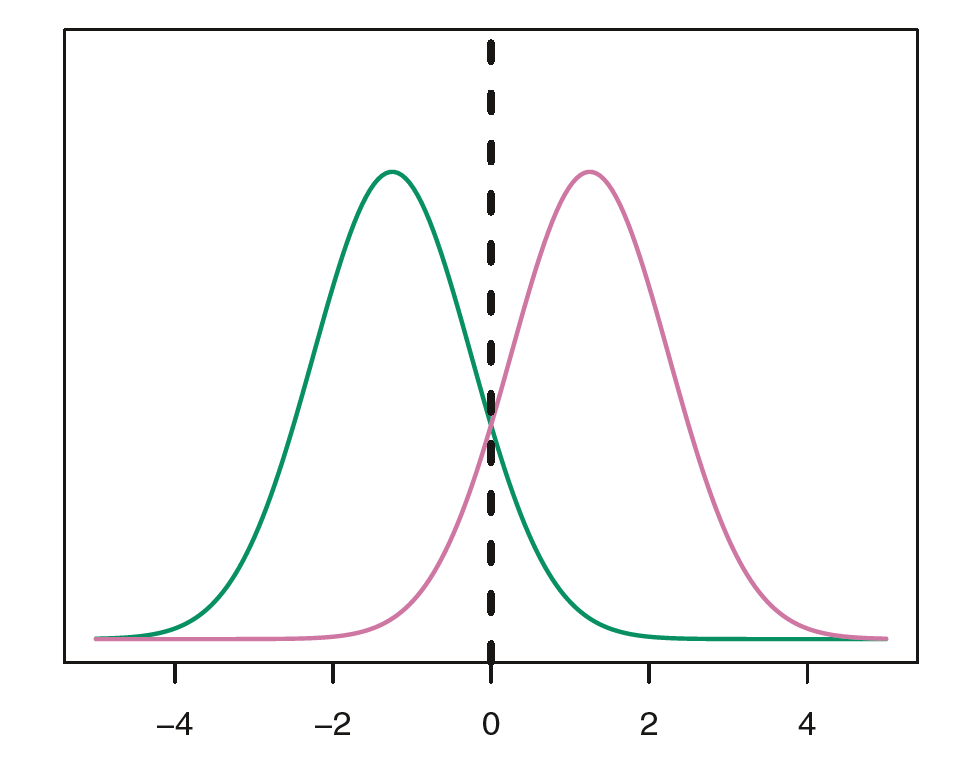

In [57]:
from IPython.display import Image
Image('images/p1.png', width =400)

+ Through LDA, the following estimates are used:
$$\begin{aligned}
    \hat{\mu}_k &= \frac{1}{n_k}\sum_{i:y_i = k}{x_i} \\
    \hat{\sigma}^2 &= \frac{1}{n-K}\sum_{k=1}^K{\sum_{i:y_i = k}{(x_i - \hat{\mu}_k)^2}}
\end{aligned}$$
+ $n$ - total number of training observations
+ $n_k$ - number of training observations in the $k$th class
+ Without prior knowledge, LDA estimates of $\pi_k$ are
    $$\hat{\pi}_k = \frac{n_k}{n}$$
+ Hence, an observation is assign to the class for which the **discriminant function**
$$\hat{\delta}_k(x) = x \cdot \frac{\hat{\mu}_k}{\hat{\sigma}^2} - \frac{\hat{\mu}_k^2}{2\hat{\sigma}^2} + \log(\hat{\pi}_k)$$
is largest.

#### Example (cont.)
+ 20 observations were drawn from each of the two classes, and are shown as histograms.
+ Dashed vertical line - Bayes decision boundary 
+ Solid vertical line - LDA decision boundary 

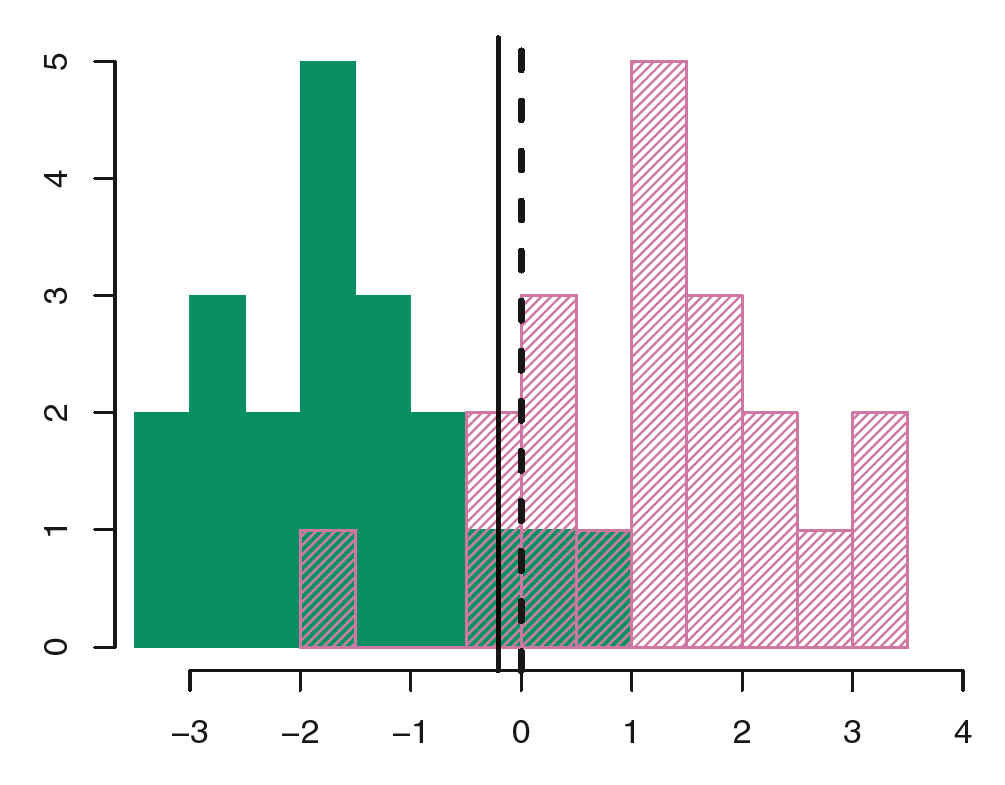

In [58]:
Image('images/p2.png', width =400)

<div class="alert alert-block alert-success"> hai </div>

### LDA for $p>1$
+ Assume $X = (X_1, X_2, \ldots, X_p)$ is drawn from a multivariate Gaussian distribution.
+ The density function is defined as 
$$f(x) = \frac{1}{(2\pi)^{p/2}|\mathbf{\Sigma}|^{1/2}} \exp \left( -\frac{1}{2}(x-\mu)^T \mathbf{\Sigma}^{-1} (x-\mu) \right)$$
 where $\mu_k$ is a class-specific mean vector and $\mathbf{\Sigma}$ is a covariance matrix that is common to all K classes.
+ The Bayes classifier assigns an observation $X = x$ to the class for which
$$\delta_k(x) = x^T \mathbf{\Sigma}^{-1} \mu_k - \frac{1}{2} \mu_k^T \mathbf{\Sigma}^{-1}\mu_k + \log{\pi_k}$$
is largest.

#### Example
+ 3 equally sized Gaussian classes, with class-specific mean vectors and a common covariance matrix.
+ Two predictors, $p=2$.
+ 20 observations from each class.

<div class="alert alert-block alert-success"> 
    <b>
        Own mean vector
    </b>
</div>

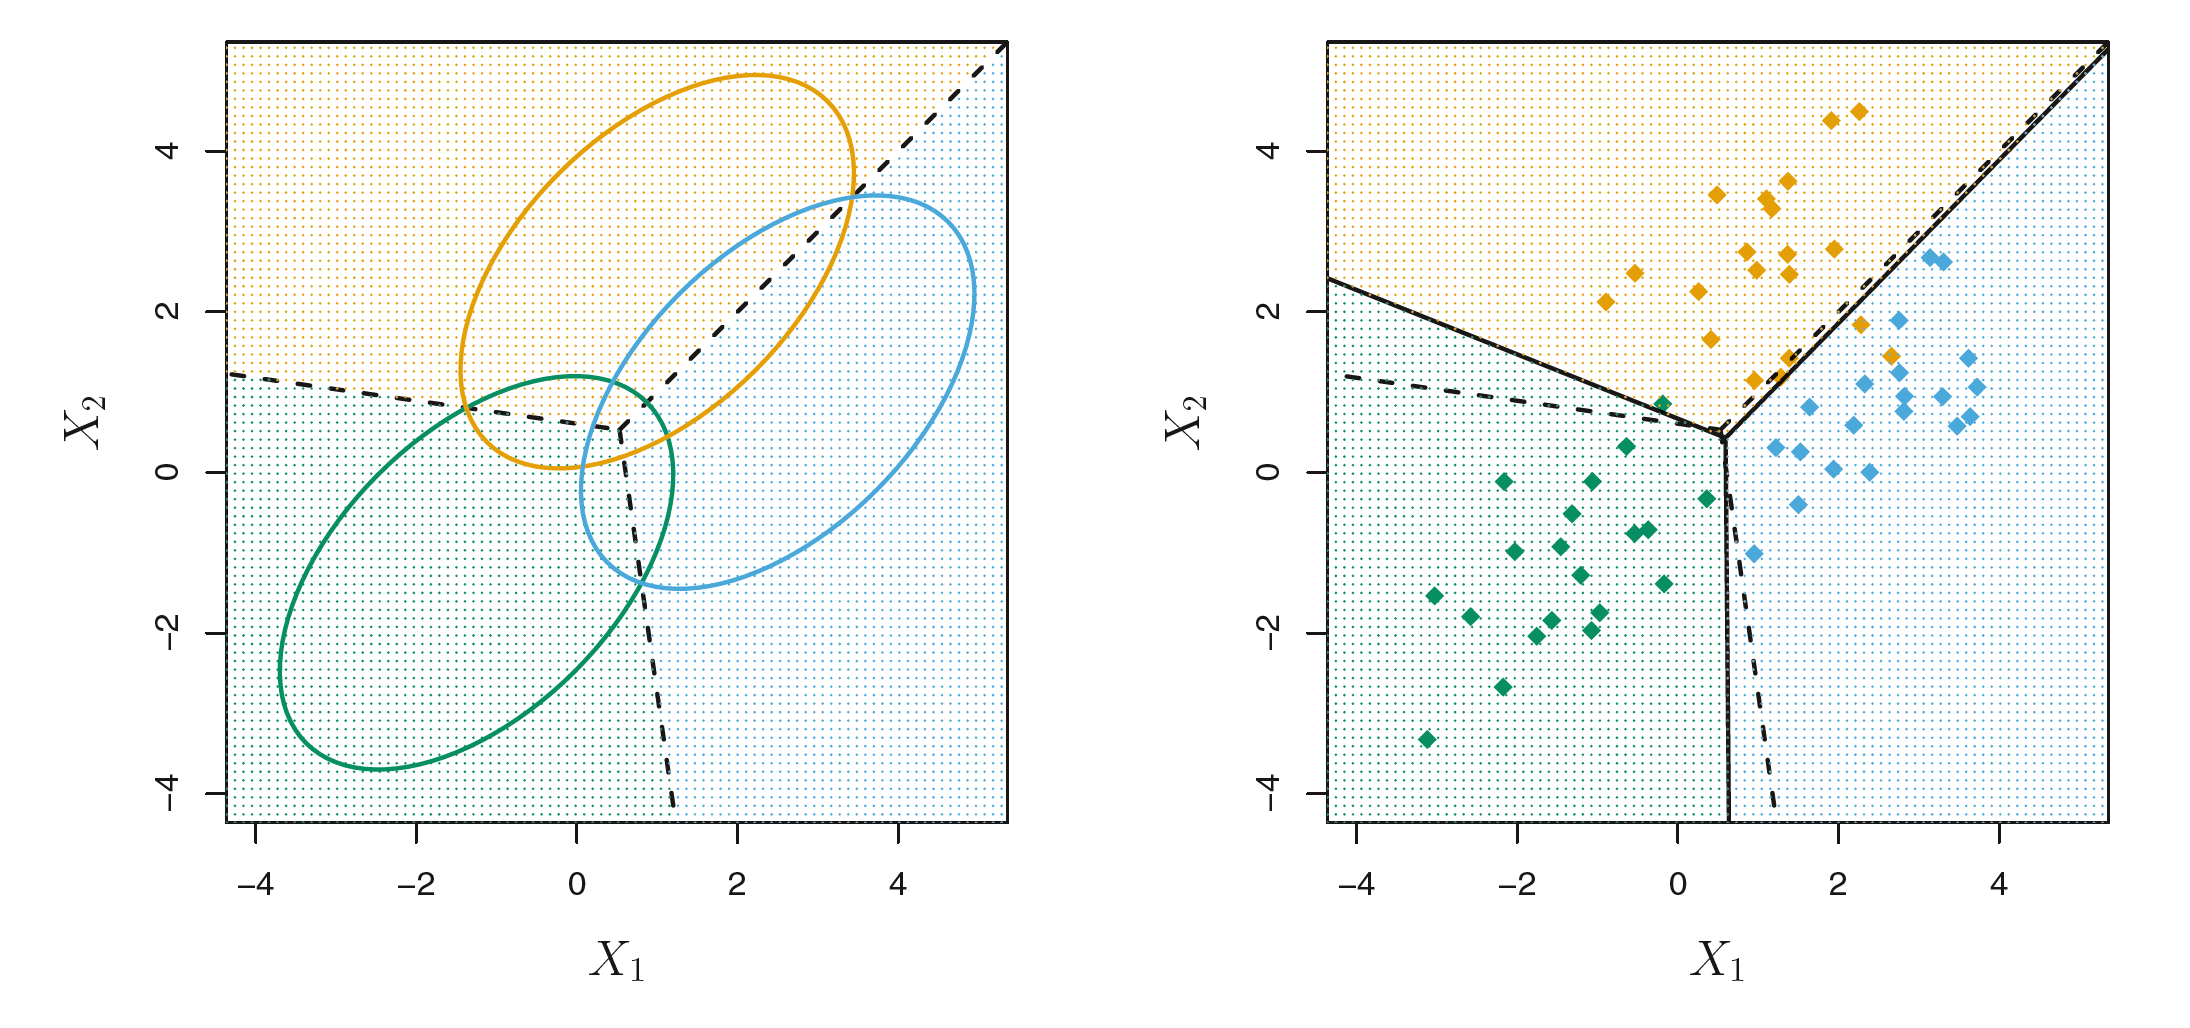

In [59]:
Image('images/p3.png', width =800)

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], 
              [-2, -1], 
              [-3, -2], 
              [1, 1], 
              [2, 1], 
              [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y, lda.predict(X))

array([[3, 0],
       [0, 3]], dtype=int64)

In [64]:
print(lda.predict([[-0.8, -1]]))

[1]


#### Example: Default Data

In [65]:
default = pd.read_csv("data/default.csv")


In [72]:
default['Yes'] = (default['default'] == 'Yes').astype(int)
default['St'] = (default['student'] == 'Yes').astype(int)

In [73]:
X=default[['St', 'balance']].values
y=default['Yes'].values

In [74]:
X

array([[0.00000000e+00, 7.29526495e+02],
       [1.00000000e+00, 8.17180407e+02],
       [0.00000000e+00, 1.07354916e+03],
       ...,
       [0.00000000e+00, 8.45411989e+02],
       [0.00000000e+00, 1.56900905e+03],
       [1.00000000e+00, 2.00922183e+02]])

In [75]:
lda.fit(X,y)

LinearDiscriminantAnalysis()

In [76]:
confusion_matrix(y,lda.predict(X))

array([[9644,   23],
       [ 252,   81]], dtype=int64)

In [79]:
confusion_matrix(lda.predict(X),y)

array([[9644,  252],
       [  23,   81]], dtype=int64)

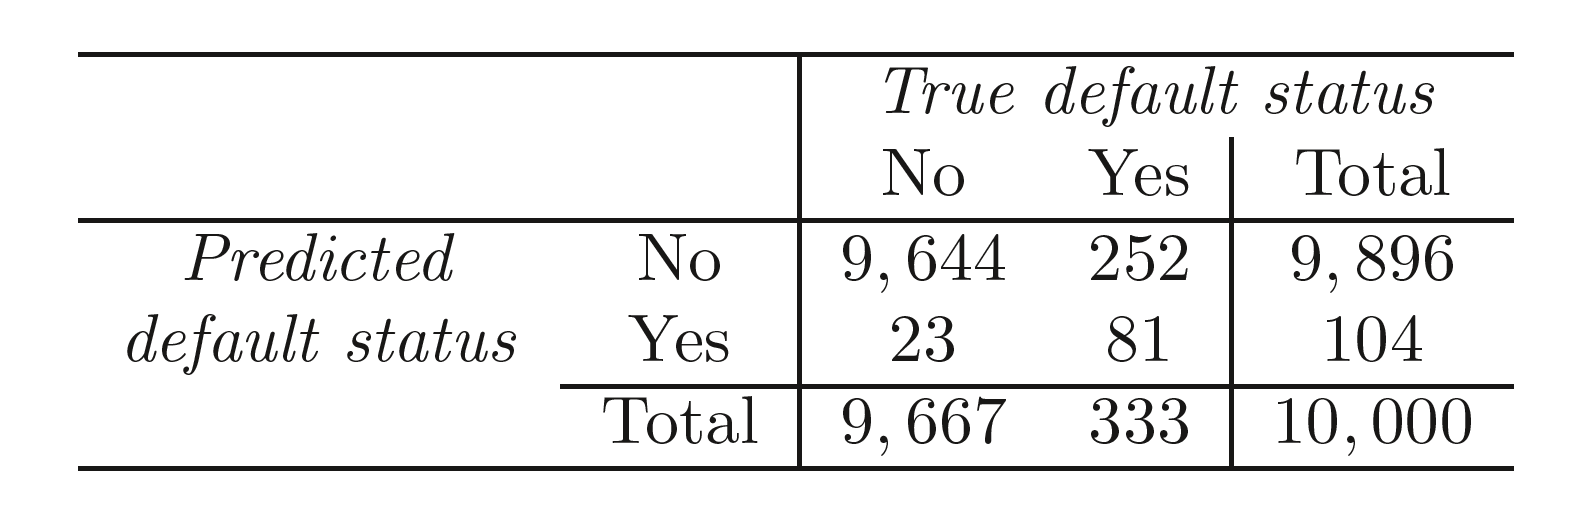

In [80]:
Image('images/p4.png', width =400)

##### Confusion matrix
+ LDA predicted that a total of 104 people would default.
+ 81 actually defaulted and 23 did not.
+ Only 23 out of 9667 of the individuals who did not default were incorrectly labeled
+ However, of the 333 individuals who defaulted, 252 (or 75.7%) were missed by LDA.
+ Even though the overall error rate is low, the error rate among individuals who defaulted is very high.

+ **Sensitivity** is the percentage of true defaulters that are identified (81/333 = 24.3%).
+ **Specificity** is the percentage of non-defaulters that are correctly identified (9644/9667 = 99.8%).
+ LDA have a low sensitivity and high specificity. This is because LDA try to yield the smallest total error.
+ This is because, Bayes classifier assign an observation to the class for which the posterior probability, $p_k(X)$ is greatest.



+ For two class case, an observation is assign to the *default* class if 
$$P(\textrm{default = Yes} \, | \, X=x) >0.5 $$
+ The threshold value (0.5) can be lowered or increased (Set by domain expert). For example, if we set 
$$P(\textrm{default = Yes} \, | \, X=x) >0.2 $$

In [81]:
lda2 = LinearDiscriminantAnalysis(priors=[0.9,0.1])
lda2.fit(X,y)
confusion_matrix(y,lda2.predict(X))

array([[9496,  171],
       [ 156,  177]], dtype=int64)

In [82]:
lda.priors_

array([0.9667, 0.0333])

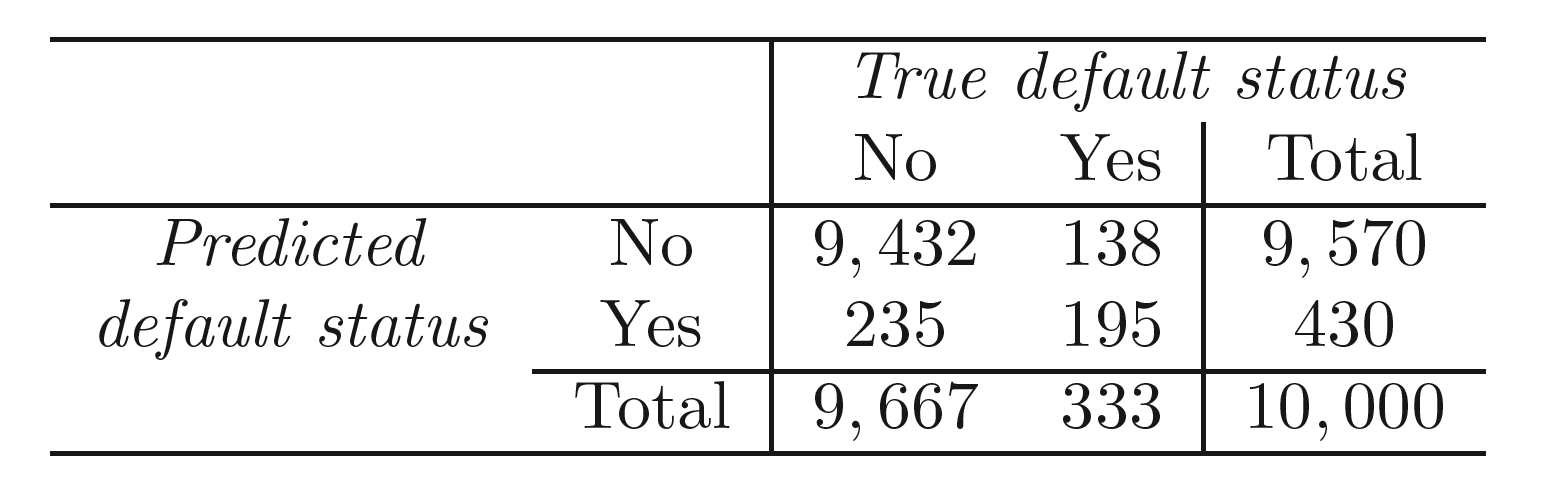

In [83]:
Image('images/p5.png', width =400)

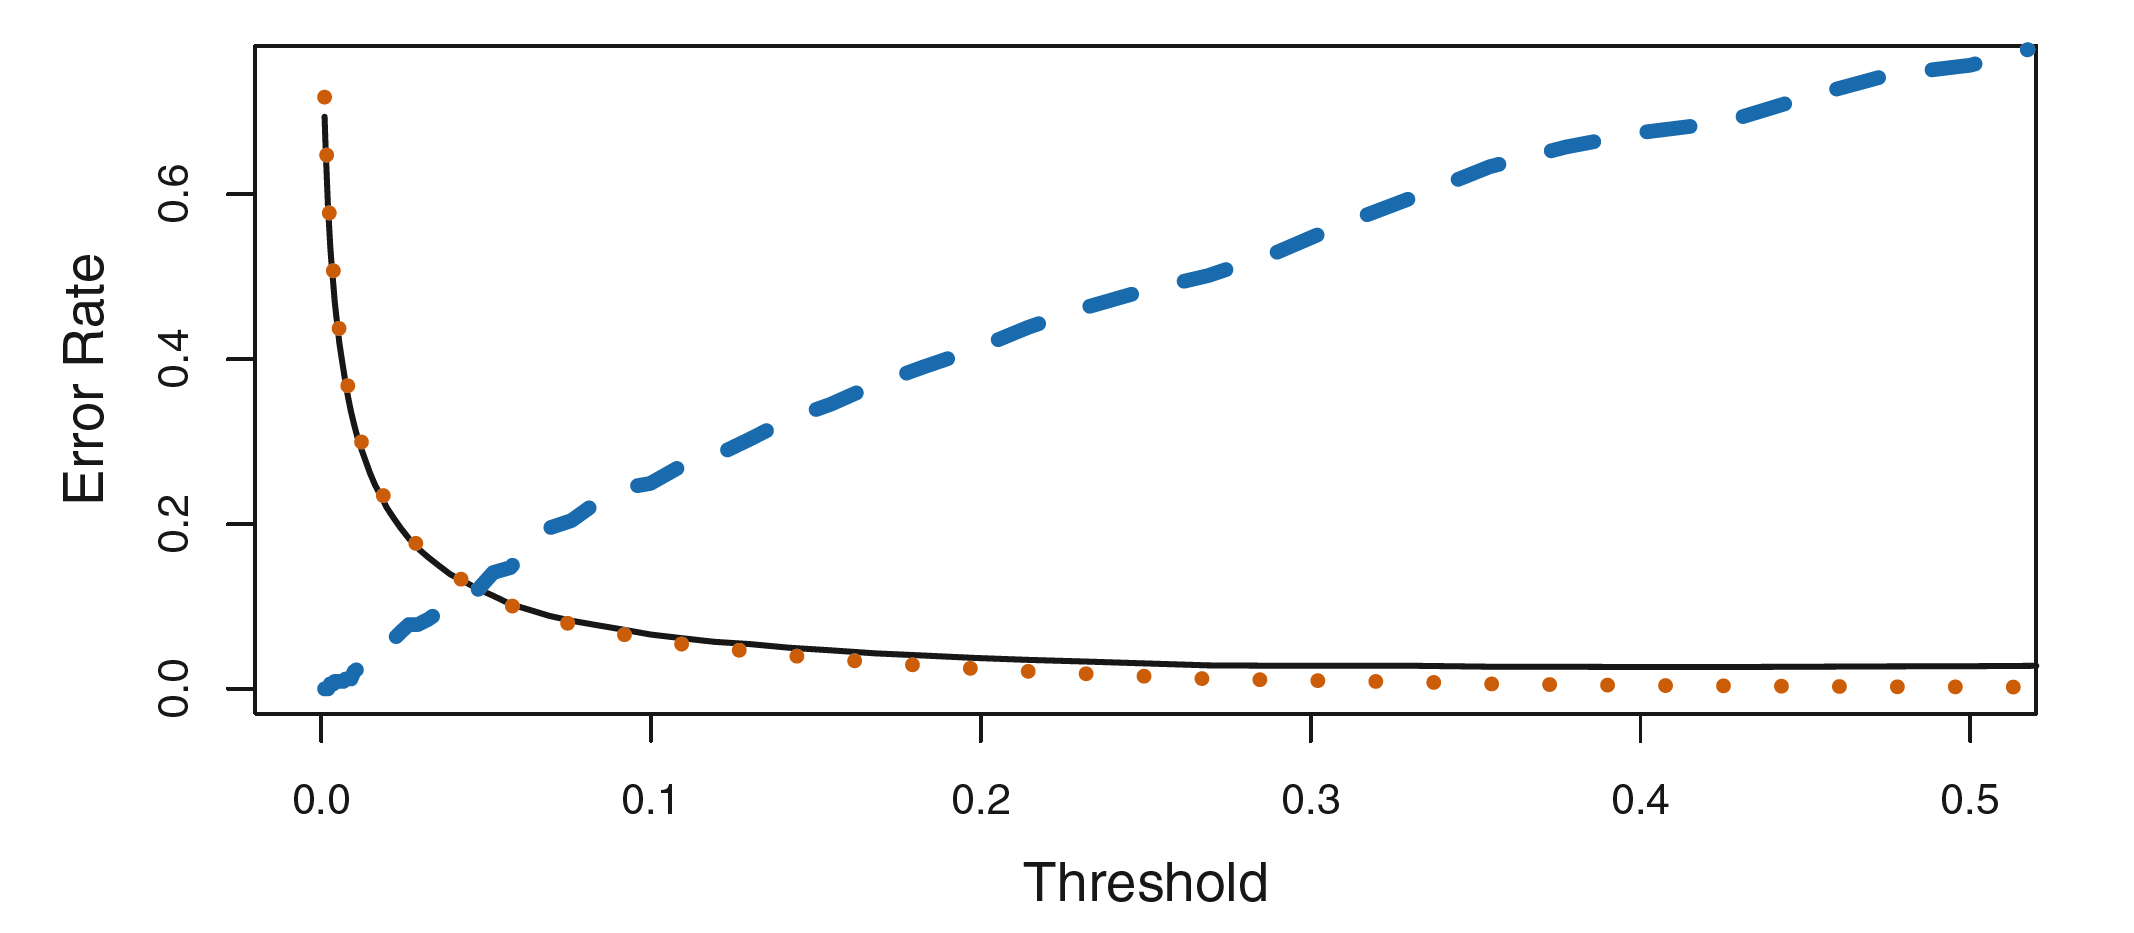

In [84]:
Image('images/p6.png', width =600)

+ black solid line - overall error rate
+ blue dashed line - the fraction of defaulting customers that are incorrectly classified
+ orange dotted line - the fraction of errors among the non-defaulting customers.

In [85]:
lr.fit(X,y)

LogisticRegression()

In [86]:
confusion_matrix(y,lr.predict(X))

array([[9628,   39],
       [ 228,  105]], dtype=int64)

#### ROC curve
+ simultaneously display the two types of errors for all possible thresholds.
+ The overall performance of a classifier, summarized over all possible thresholds, is given by the area under the (ROC) curve (AUC).
+ The larger the AUC the better the classifier.
+ True positive rate = sensitivity
+ False positive rate = (1 - specifictity)

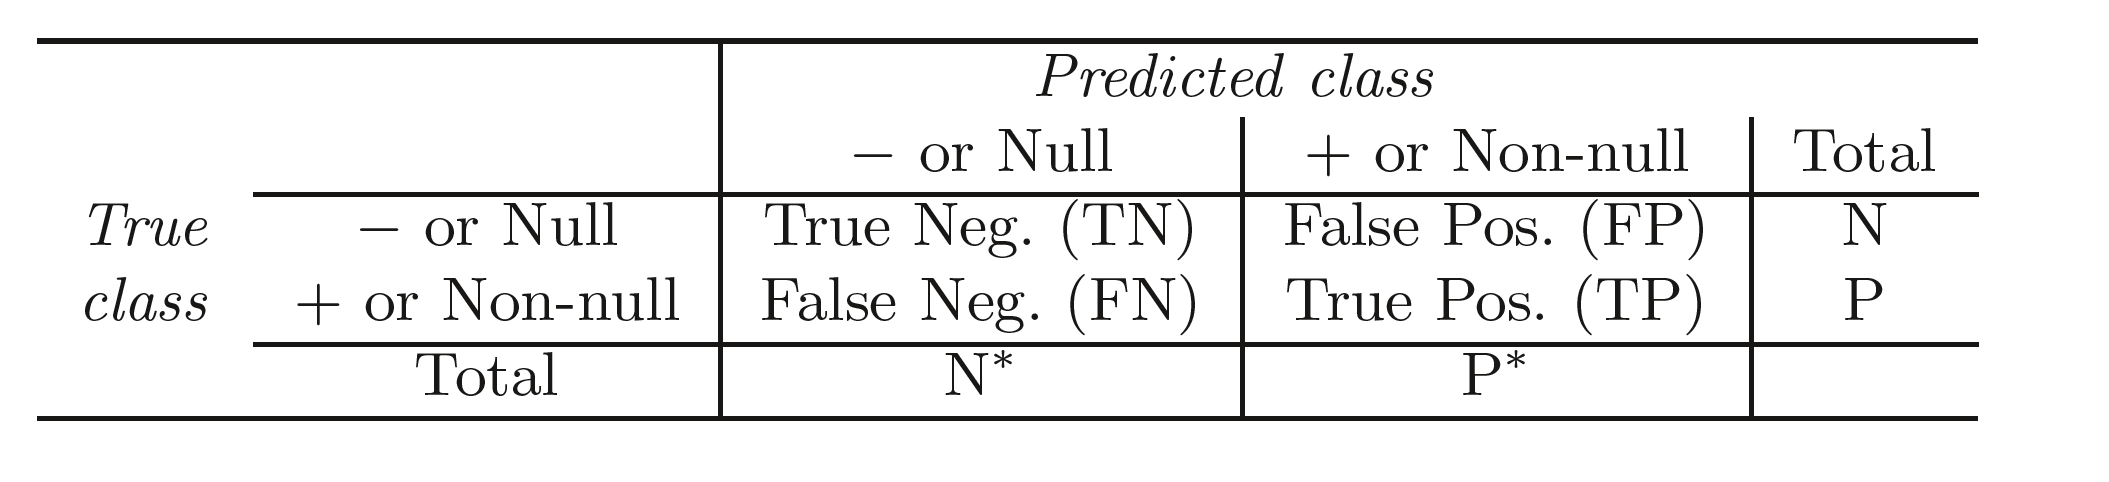

In [87]:
Image('images/p8.png', width =600)

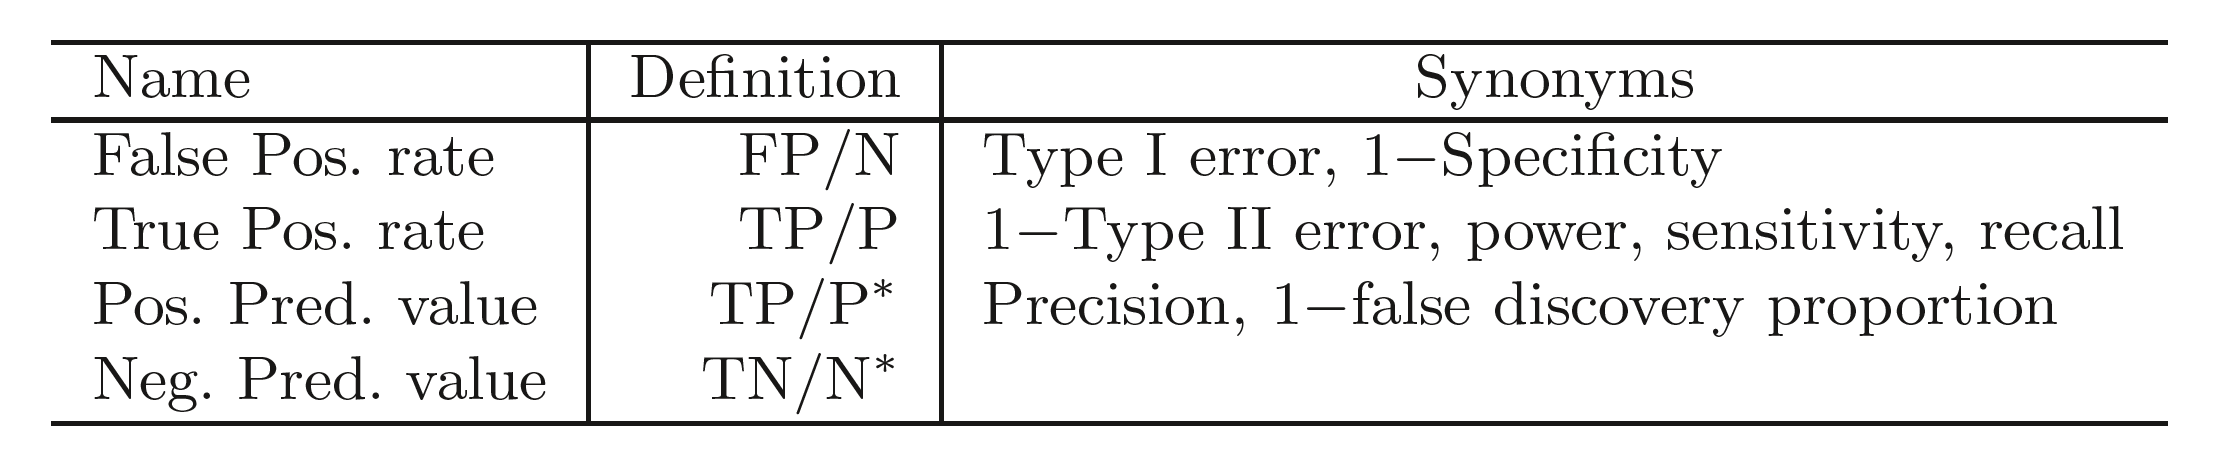

In [88]:
Image('images/p9.png', width =600)

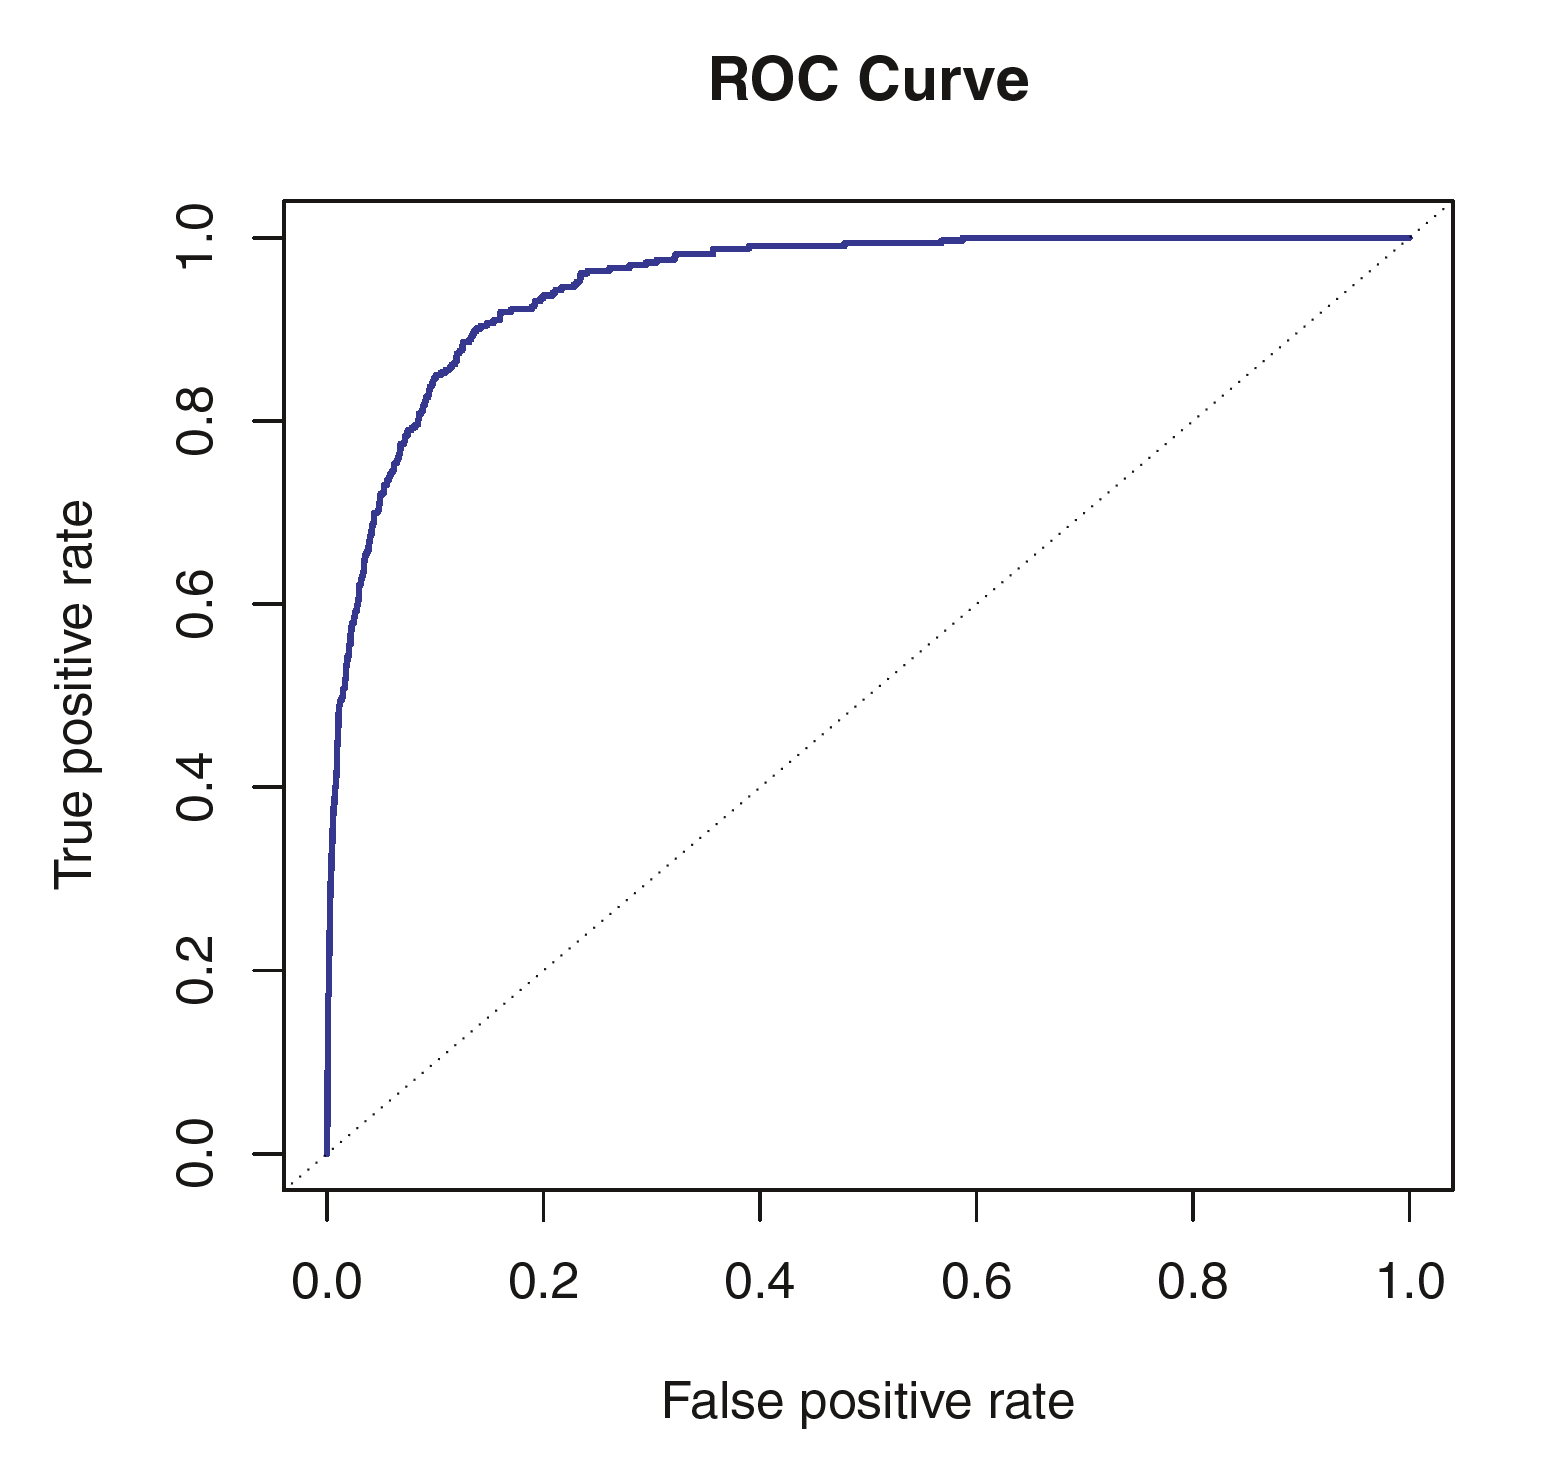

In [91]:
# Receiver Operating Characteristic (ROC) Area Under the Curve (AUC)
Image('images/p7.png', width =400)

<div class="alert alert-block alert-success"> Qualitative Data Analysis (QDA) </div>

### QDA
+ Same as LDA, QDA assumes the observations from each class are drawn from a Gaussian distribution.
+ However, QDA assumes that each class has its own covariance matrix.
$$\begin{aligned}
\delta_k(x) &= -\frac{1}{2} (x-\mu_k)^T \mathbf{\Sigma}_k^{-1} (x-\mu_k) - \frac{1}{2} \log| \mathbf{\Sigma}_k| + \log{\pi_k} \\
&= -\frac{1}{2} x^T \mathbf{\Sigma}_k^{-1} x +  x^T \mathbf{\Sigma}_k^{-1} \mu_k - \frac{1}{2} \mu_k^T \mathbf{\Sigma}_k^{-1} \mu_k - \frac{1}{2} \log| \mathbf{\Sigma}_k| + \log{\pi_k} 
\end{aligned}$$
+ LDA is a much less flexible (lower variance) classifier than QDA


#### Example
+ The Bayes (purple dashed), LDA (black dotted), and QDA (green solid) 
+ Left: Equal covariances
+ Right: Not equal covariances

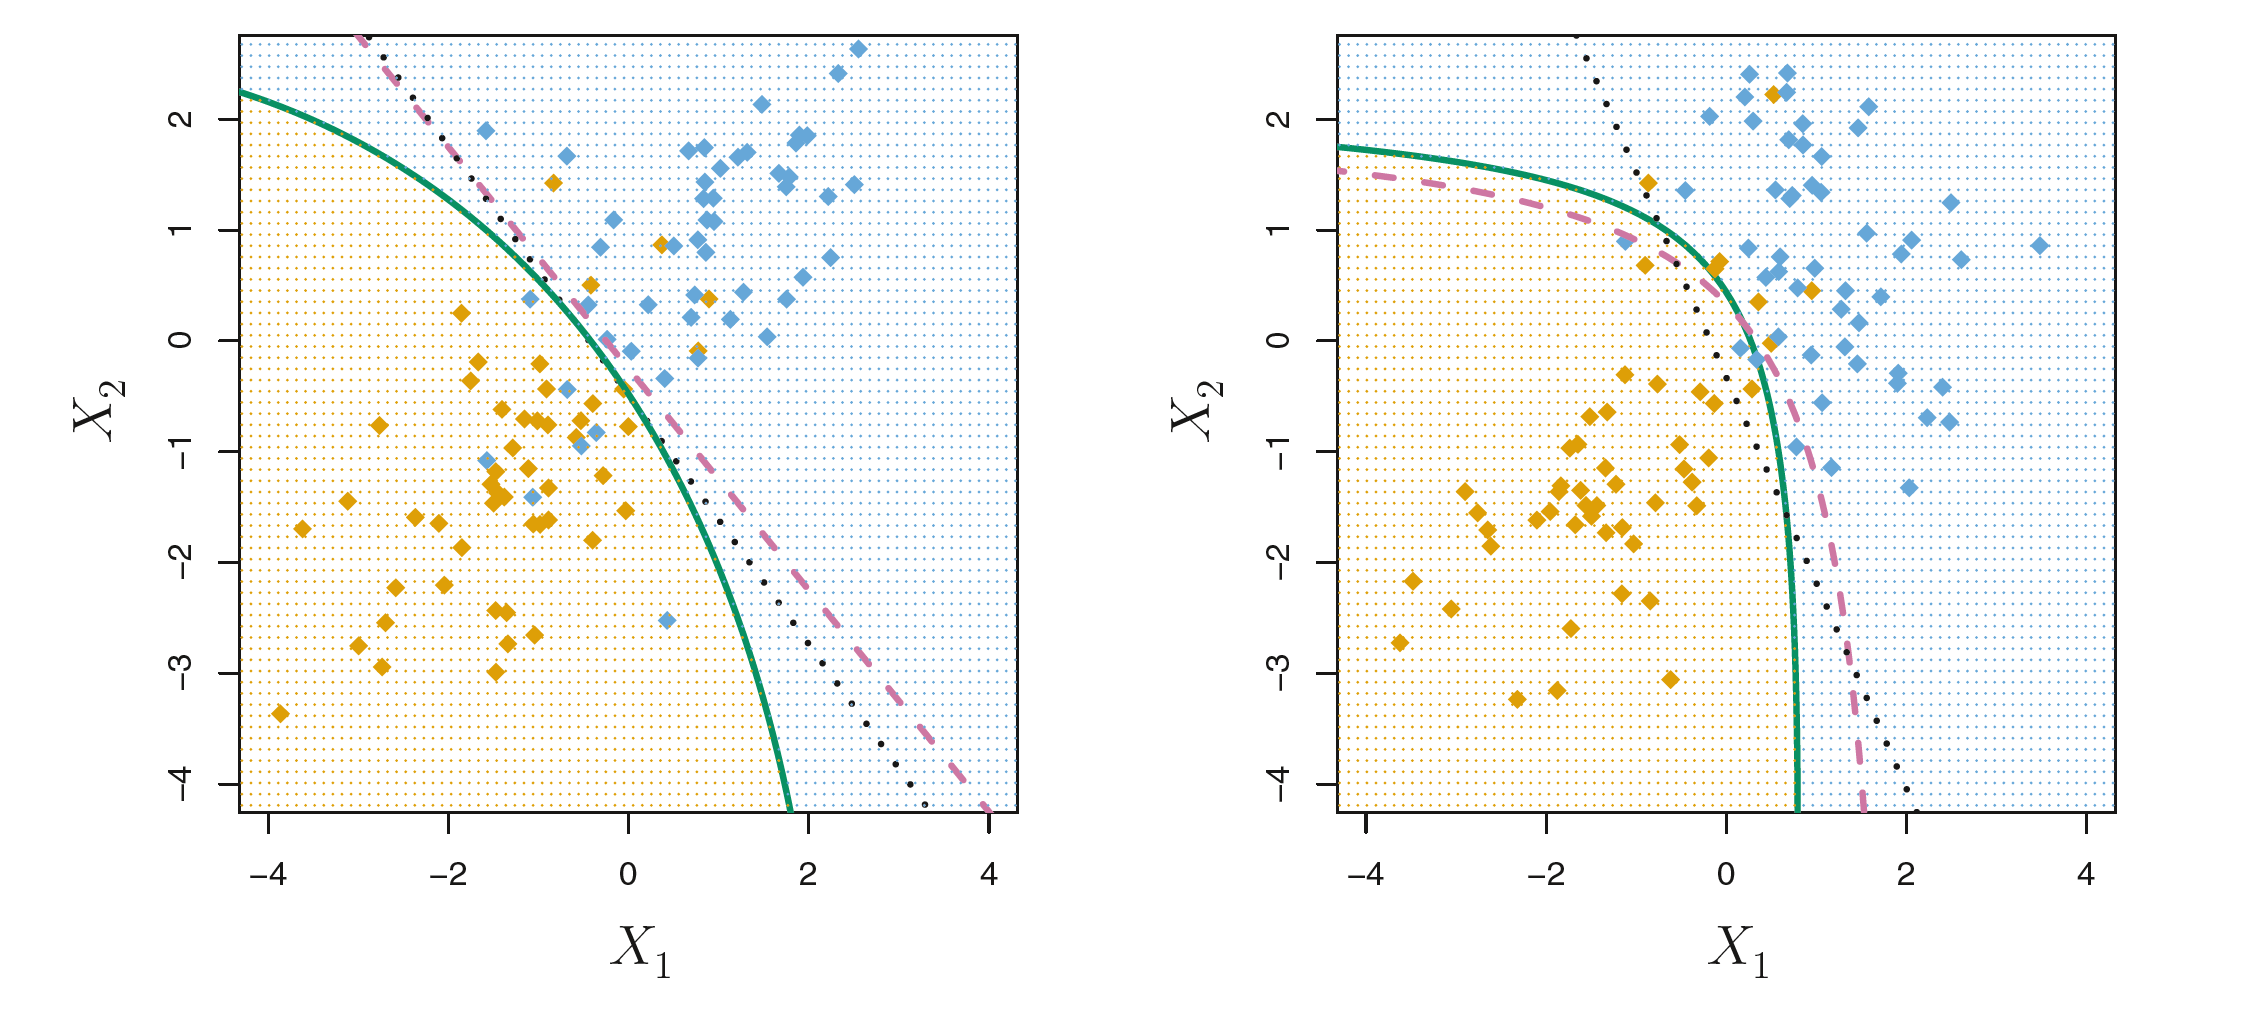

In [92]:
Image('images/p10.png', width =700)

# Stock market prediciton lab
This data set consists of:
+ percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. 
+ For each date, we have recorded the percentage returns for each of the five previous trading days, Lag1 through Lag5. 
+ We have also recorded :
    + Volume (the number of shares traded on the previous day, in billions), 
    + Today (the percentage return on the date in question) 
    + Direction (whether the market was Up or Down on this date).

In [93]:
smarket = pd.read_csv('data/smarket.csv')
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [94]:
smarket['Up'] = np.where(smarket['Direction'] == 'Up', 1, 0)

In [95]:
smarket.drop(columns='Direction').corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Up
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,0.074608
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Up,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


In [96]:
X = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values
y = smarket['Up'].values

In [111]:
train_bool = smarket['Year'].values < 2005
X_train = X[train_bool]
X_test = X[~train_bool]
y_train = y[train_bool]
y_test = y[~train_bool]

In [99]:
results = smf.logit('Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data=smarket).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691327
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                            5
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                0.001651
Time:                        15:13:00   Log-Likelihood:                -864.16
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7219
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0742      0.057      1.309      0.191      -0.037       0.185
Lag1          -0.0713      0.050     -1.424      0.155      -0.170       0.027
Lag2          -0.0441      0.050     -0.882      0.378      -0.142       0.054
Lag3           0.0092      0.050      0.185      0.853      -0.089       0.107
Lag4           0.0072      0.050      0.145      0.885      -0.091       0.105
Lag5           0.0093      0.049      0.188      0.851      -0.088       0.106
==============================================================================
"""

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [114]:
# true on the left axis, predicted above
confusion_matrix(y_test, lr.predict(X_test))

array([[ 37,  74],
       [ 31, 110]], dtype=int64)

In [115]:
147/ len(y_test)

0.5833333333333334

Out of the 68 predicted down, 37 actually were down days. 54% accurracy  
Out of the 184 predicted up, 110 actually were up. 60% accuracy.  
58% total accuracy

In [116]:
y_pred = lr.predict(X_test)

In [117]:
y_pred[y_test == 1]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

In [106]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [107]:
lda = LinearDiscriminantAnalysis()

In [108]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [109]:
#almost exact same as logistic regression
confusion_matrix(y_test, lda.predict(X_test))

array([[ 37,  74],
       [ 30, 111]], dtype=int64)

In [110]:
lda.priors_

array([0.49198397, 0.50801603])

In [121]:
# use QDA with only 2 variables
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train[:,:2], y_train)

QuadraticDiscriminantAnalysis()

In [122]:
#almost exact same as logistic regression
confusion_matrix(y_test, qda.predict(X_test[:,:2]))

array([[ 30,  81],
       [ 20, 121]], dtype=int64)

In [123]:
# knn
from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train[:,:2], y_train)

In [ ]:
confusion_matrix(y_test, knn.predict(X_test[:,:2]))

# Exercises

# 1
Turn equation 4.2 to 4.3

4.2
$$p(x) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

4.3
$$\frac{p(x)}{1 - p(x)} = e^{\beta_0 + \beta_1X}$$

First, multiply 4.2 by negative 1 and add 1 to both sides
$$1 - p(x) = 1 - \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$
Simplify right hand side
$$1 - p(x) = \frac{1}{1 + e^{\beta_0 + \beta_1X}}$$
Now just divide 4.2 by the last equation and you have the result

# 2 
Prove that 4.13 maximizes 4.12.

Since log is a monotone increasing function, maximizing the log of a function will also maximize the original function. After taking the log of 4.12 all constants can be dropped and you are left with the 4.13.

# 3
Prove that QDA is quadratic with one predictor

This is show by taking the log of 4.12 and throwing away all terms that don't depend on k. An extra term will be left attached to $x^2$ thus making it quadratic. This term disappears in LDA because all the variances are the same.

# 4
It's easiest to think in terms of each X in a range of 0 - 100
a) 10 / 100 = 10%  
b) 10 x 10 / (100 x 100) = 1%  
c) $10^{-100}$. The fraction of nearest neighbors is $10^{-p}$  
d) even in 2 dimensions only 1% of neighbors will be within 5% on either side  
e) 10% for p=1.
Generalizing we get $.1^{1/p}$

# 5
a) QDA on training. LDA on test  
b) QDA on both  
c) Since QDA is a quadratic model, more data should improve the model faster than LDA  
d) False, QDA will overfit by finding a different variance for each class when in reality the variance for each class are the same

# 6

In [ ]:
# a
b0 = -6
b1 = .05
b2 = 1
x1 = 40
x2 = 3.5
t = -6 + b1 * x1 + b2 * x2
print("student has a {:.3f} probability of getting an A".format(1 / (1 + np.exp(-t))))

#b. solve for t = 0. Since an odds of 1 corresponds to 50/50 chance and log(1) = 0
# 0 = -6 + b1 * x1 + b2 * x2
hours = (6 - b2 * x2) / b1
print("student needs to study {} hours to have a 50% chance at an A".format(1 / (1 + np.exp(-t))))

In [ ]:
# double check 50%
b0 = -6
b1 = .05
b2 = 1
x1 = 50
x2 = 3.5
t = -6 + b1 * x1 + b2 * x2
1 / (1 + np.exp(-t))

# 7

In [ ]:
# 7
prior = .8
mu_d = 10
mu_no_d = 0
sigma = 6
normal = lambda x, m, s: 1 / np.sqrt(2 * np.pi * s ** 2) * np.exp(-(x - m) ** 2 / (2 * s ** 2))

In [ ]:
f_d = normal(4, 10, 6)
f_no_d = normal(4, 0, 6)
f_d, f_no_d

In [ ]:
# bayes
prob_div = prior * f_d / (prior * f_d + (1 - prior) * f_no_d)
print("Probability of dividend is {:.3f}".format(prob_div))

# 8
Since knn with k equal to 1 always picks itself, its training error is 0. Meaning in the given example the test error is .36 and worse than logistic regression.

# 9

In [ ]:
# a
# p / (1 - p) = .37
# 1 / p - 1 = 1 / .37
odds = .37
one_over_p = 1 + 1 / odds
p = 1 / one_over_p
print("The probability of defaulting with odds of {} are {:.2f}".format(odds, p))
print("The odds of defaulting with probability .16 are {:.2f}".format(.16 / .84))

# 10

In [ ]:
weekly = pd.read_csv("data/weekly.csv")
weekly.head()

In [ ]:
# strongest correlations with today are lag1 and lag3
weekly.drop(columns="Direction").corr()

In [ ]:
today = weekly['Today']

In [ ]:
today_perc = (100 + today) / 100

In [ ]:
today_perc.cumprod().plot()

In [ ]:
weekly['Volume'].plot()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Direction', y='Lag1', data=weekly)

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Direction', y='Lag3', data=weekly)

In [ ]:
weekly['Direction'] = np.where(weekly['Direction'] == 'Up', 1, 0)

In [ ]:
# wow lag2 is statistically significant
results = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly).fit()
results.summary()

In [ ]:
# wow lag2 is statistically significant
results = smf.logit('Direction ~ Lag2', data=weekly).fit()
results.summary()

In [ ]:
predictions = np.where(results.predict(weekly) > .5, 1, 0)

In [ ]:
confusion_matrix(weekly['Direction'], predictions)

In [ ]:
451 / 1030 

In [ ]:
weekly['Direction'].mean()

The default prediciton is Up - about 95% of the predictions are up and it actually gets 56.2% correct but that's only slightly higher than the 55.6% total up days.

In [ ]:
# use sklearn for rest of problems
year_bool = weekly['Year'] < 2009
weekly['ones'] = 1
X_train = weekly[year_bool][['ones', 'Lag2']].values
X_test = weekly[~year_bool][['ones', 'Lag2']].values
y_train = weekly[year_bool]['Direction'].values
y_test = weekly[~year_bool]['Direction'].values

In [ ]:
lr =  LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
# not bad
confusion_matrix(y_test, lr.predict(X_test))

In [ ]:
# e
# use LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
confusion_matrix(y_test, lda.predict(X_test))

In [ ]:
# terrible
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
confusion_matrix(y_test, qda.predict(X_test))

In [ ]:
# very poor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

In [ ]:
# h
# logistic regression and LDA work the best

In [ ]:
# i
# not bad when predicting up
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

In [ ]:
# try many combinations
results = smf.logit('Direction ~ np.power(Lag5, 2)', data=weekly).fit()
results.summary()

In [ ]:
# try many combinations
results = smf.logit('Direction ~ np.power(Volume, 2)', data=weekly).fit()
results.summary()

In [ ]:
# try many combinations
results = smf.logit('Direction ~ Volume * Lag3', data=weekly).fit()
results.summary()

# 12

In [ ]:
# a
auto = pd.read_csv('data/auto.csv')

In [ ]:
auto['mpg01'] = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)

In [ ]:
auto.corr()

In [ ]:
X = auto[['cylinders', 'origin']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

In [ ]:
X = auto[['cylinders', 'origin', 'year', 'acceleration']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# slightly higher with more variables
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

In [ ]:
X = auto[auto.columns[1:-1] - ['name']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Quite a bit better with all variables and high regularlization
lr = LogisticRegression(C=.01)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

In [ ]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

In [ ]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

In [ ]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# looks like 18-32 for K yields the best results
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    print('With K={} accuracy is {:.3f}'.format(k, accuracy))

# 12

In [ ]:
power = lambda x, a: x ** a

In [ ]:
power(3, 8)

In [ ]:
n = 100
plt.plot(range(n), [power(x, 2) for x in range(n)])

In [ ]:
def plot_power(rng, p):
    plt.plot(rng, [power(x, p) for x in rng])

In [ ]:
plot_power(range(3,14), 3)

# 13

In [ ]:
boston = pd.read_csv('data/boston.csv')
boston['crim01'] = np.where(boston['crim'] > boston['crim'].median(), 1, 0)
boston.head()

In [ ]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

In [ ]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

In [ ]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))